Considerando a base de dados experimento_test_ab.csv responda as questões abaixo:


In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. Qual dos cenários tem a maior taxa de conversão?


In [2]:
df_experimento = pd.read_csv('experimento_teste_ab.csv')

In [3]:
df_experimento.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [4]:
df_experimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [6]:
df_experimento.describe()

,Visitante_ID,Visualizações,Conversões
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,150.755500,0.115000
std,577.494589,28.809421,0.319102
min,1.000000,100.000000,0.000000
25%,500.750000,126.000000,0.000000
50%,1000.500000,151.000000,0.000000
75%,1500.250000,175.000000,0.000000
max,2000.000000,199.000000,1.000000


In [7]:
df_experimento_a = df_experimento.loc[df_experimento['Versão_Página'] == "A"]

In [8]:
visualizacoes_a = df_experimento_a['Visualizações'].sum()

In [9]:
conversao_a = df_experimento_a['Conversões'].sum()

In [10]:
df_experimento_b = df_experimento.loc[df_experimento['Versão_Página'] == "B"]

In [11]:
visualizacoes_b = df_experimento_b['Visualizações'].sum()

In [12]:
conversao_b = df_experimento_b['Conversões'].sum()

In [13]:
taxa_conversao_a = conversao_a / visualizacoes_a
taxa_conversao_b = conversao_b / visualizacoes_b

In [14]:
print(f'Taxa de conversão da Versão A: {taxa_conversao_a * 100}%.')
print(f'Taxa de conversão da Versão B: {taxa_conversao_b * 100}%.')

Taxa de conversão da Versão A: 0.06961249046971857%.
Taxa de conversão da Versão B: 0.08295946268815206%.


2. Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

a. O cenário A, da base, como o inicial, que funciona hoje.

b. Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).

c. Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.

d. O aumento para 10% de conversão.



In [15]:
q2_alpha = 0.05
q2_beta = 0.2
nova_conversao = (taxa_conversao_a*(1 + 0.1))
variancia_a = df_experimento_a['Conversões'].var()

In [16]:
print(taxa_conversao_a)

0.0006961249046971857


In [17]:
print(nova_conversao)

0.0007657373951669042


In [18]:
##Delta
delta_a = 0.0007657373951669042 - 0.0006961249046971857
print(delta_a)

6.961249046971859e-05


In [19]:
## Z(1-alpha/2)
alpha_zscore = stats.norm.ppf(1-q2_alpha/2)
print(alpha_zscore)

1.959963984540054


In [20]:
## Z(1-beta)
beta_zscore = stats.norm.ppf(1-q2_beta)
print(beta_zscore)

0.8416212335729143


In [22]:
var = 2 * variancia_a
print('Variância estimada: {}'.format(str(var)))

Variância estimada: 0.18813813813813812


In [23]:
## Fórmula
n = (((alpha_zscore + beta_zscore)**2)*var)/delta_a
print(f'Amostra necessária para o grupo A: {n}')
print(f'Amostra necessária para o teste AB: {n*2}')

Amostra necessária para o grupo A: 21212.768135812556
Amostra necessária para o teste AB: 42425.53627162511


Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:


In [24]:
df_pacientes = pd.read_csv('pacientes.csv')

In [25]:
df_pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [26]:
df_pacientes = df_pacientes.drop(columns=["Unnamed: 0", "Genero", "Etnia", "Estado_Saude"])

In [27]:
nomes_colunas = {"Pressao_Arterial": "Pressão Arterial", 
                "Idade:": "Idade", 
                "Nome_Genero": "Gênero",
                "Nome_Etnia": "Etnia", 
                "Nome_Estado_Saude": "Estado de Saúde"
                }

In [28]:
df_pacientes = df_pacientes.rename(columns=nomes_colunas)

3. Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.


In [29]:
q3_alpha = 0.05

In [30]:
q3_indices = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769,
209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967,
699, 473, 222, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
146, 505, 273, 957, 362]

In [31]:
q3_indices.sort()

In [32]:
print(q3_indices)

[36, 39, 84, 89, 146, 184, 209, 217, 222, 224, 232, 255, 269, 273, 280, 311, 348, 358, 362, 381, 400, 402, 439, 473, 505, 558, 639, 677, 697, 699, 715, 726, 751, 756, 757, 768, 769, 793, 883, 895, 907, 909, 957, 967]


In [33]:
q3_df = df_pacientes.iloc[q3_indices, :]

In [34]:
q3_df

,Pressão Arterial,Idade,Gênero,Etnia,Estado de Saúde
36,168.708224,41,Feminino,Asiático,Com condições de saúde adicionais
39,144.565778,50,Masculino,Hispânico,Saudável
84,172.697749,63,Masculino,Asiático,Saudável
89,154.485901,41,Feminino,Asiático,Saudável
146,157.727254,69,Feminino,Caucasiano,Saudável
184,159.939299,47,Feminino,Caucasiano,Saudável
209,151.856477,36,Masculino,Asiático,Saudável
217,157.458801,60,Masculino,Hispânico,Saudável
222,145.933389,64,Feminino,Caucasiano,Saudável
224,145.340019,49,Masculino,Caucasiano,Saudável


In [35]:
q3_df = q3_df.loc[q3_df["Estado de Saúde"] == "Com condições de saúde adicionais"]

In [36]:
q3_df.shape[0] #quantidade de pessoas na amostra

19

Text(0.5, 1.0, 'Histograma das idades dos pacientes do df3')

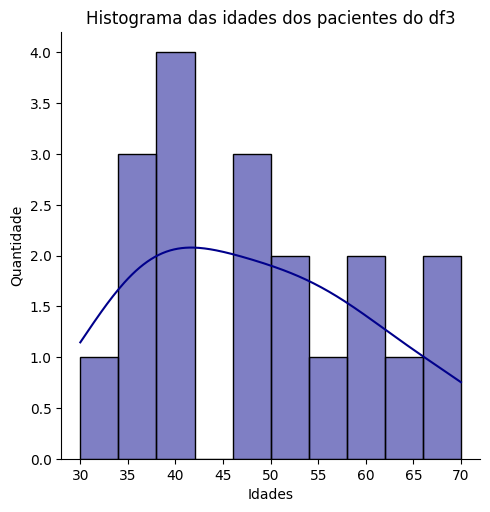

In [38]:
sns.displot(q3_df["Idade"], kde=True, bins=10, color = 'darkblue')
plt.xlabel("Idades")
plt.ylabel("Quantidade")
plt.title("Histograma das idades dos pacientes do df3")

In [39]:
#Teste T
q3_x = q3_df['Idade'].mean()
q3_u = 50
q3_s = q3_df['Idade'].std()
q3_n = q3_df.shape[0]

In [40]:
q3_t = (q3_x - q3_u) /(q3_s/(q3_n^2))

In [41]:
# P-valor
q3_p_valor = stats.norm.sf(abs(q3_t))

In [42]:
if q3_alpha > q3_p_valor:
    print("A hipótese nula foi rejeitada, a média das pessoas na amostra possuem menos de 50 anos.")
else:
    print("A hipótese nula não foi rejeitada, a média das pessoas na amostra possuem mais de 50 anos.")

A hipótese nula foi rejeitada, a média das pessoas na amostra possuem menos de 50 anos.


4. Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?


5. Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.


In [43]:
q5_indices = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

In [44]:
q5_indices.sort()

In [45]:
q5_df = df_pacientes.iloc[q5_indices, :]

In [46]:
q5_df

,Pressão Arterial,Idade,Gênero,Etnia,Estado de Saúde
6,150.750643,52,Feminino,Hispânico,Com condições de saúde adicionais
19,160.089332,38,Feminino,Afro-americano,Saudável
60,161.136755,35,Feminino,Afro-americano,Com condições de saúde adicionais
67,158.427577,45,Feminino,Caucasiano,Com condições de saúde adicionais
105,151.920500,34,Masculino,Asiático,Com condições de saúde adicionais
174,148.278546,32,Feminino,Afro-americano,Saudável
201,152.837941,64,Masculino,Afro-americano,Saudável
319,161.163704,52,Feminino,Asiático,Com condições de saúde adicionais
346,164.313189,51,Feminino,Asiático,Com condições de saúde adicionais
354,152.429706,57,Feminino,Afro-americano,Saudável


In [47]:
saudavel_mask = q5_df["Estado de Saúde"].str.contains("Saudável")

In [48]:
n_saudavel_mask = q5_df["Estado de Saúde"].str.contains("Com condições de saúde adicionais")

In [49]:
q5_df[saudavel_mask]['Pressão Arterial'].mean()

152.94305165531088

In [50]:
q5_df[n_saudavel_mask]['Pressão Arterial'].mean()

153.1972544980592

In [51]:
q5_alpha = 0.06
#Teste T
q5_x = q5_df[n_saudavel_mask]['Pressão Arterial'].mean()
q5_u = q5_df[saudavel_mask]['Pressão Arterial'].mean()
q5_s = q5_df[n_saudavel_mask]['Pressão Arterial'].std()
q5_n = q5_df[n_saudavel_mask]['Pressão Arterial'].shape[0]

In [52]:
q5_t = (q5_x - q5_u) /(q5_s/(q5_n^2))

In [53]:
# P-valor
q5_p_valor = stats.norm.sf(abs(q5_t))

In [54]:
if q5_alpha > q5_p_valor:
    print("A hipótese nula foi rejeitada, a média de pressão arterial dos dois grupos não é a mesma.")
else:
    print("A hipótese nula não foi rejeitada, a média da pressão arterial dos dois grupos é a mesma.")

A hipótese nula não foi rejeitada, a média da pressão arterial dos dois grupos é a mesma.


6. Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)

a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.

b. Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.


In [55]:
asiatico_mask = df_pacientes['Etnia'].str.contains("Asiático")
hispanico_mask = df_pacientes['Etnia'].str.contains("Hispânico")
caucasiano_mask = df_pacientes['Etnia'].str.contains("Caucasiano")
afro_ame_mask = df_pacientes['Etnia'].str.contains("Afro-americano")

In [56]:
media_asiatico = df_pacientes[asiatico_mask]['Pressão Arterial']
media_hispanico = df_pacientes[hispanico_mask]['Pressão Arterial']
media_caucasiano = df_pacientes[caucasiano_mask]['Pressão Arterial']
media_afro_ame = df_pacientes[afro_ame_mask]['Pressão Arterial']

In [57]:
q6_alpha = 0.05

In [58]:
q6_anova = stats.f_oneway(media_afro_ame, media_asiatico, media_caucasiano, media_hispanico)

In [59]:
q6_p_valor = q6_anova.pvalue

In [60]:
if q6_alpha > q6_p_valor:
    print("A hipótese nula foi rejeitada, a média de pressão arterial é diferente entre ao menos dois grupos.")
else:
    print("A hipótese nula não foi rejeitada, a média da pressão arterial é igual entre os grupos.")

A hipótese nula não foi rejeitada, a média da pressão arterial é igual entre os grupos.


7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado) 


In [61]:
df7 = df_pacientes

In [62]:
#Criando tabela de contigência
chi = pd.crosstab(df7["Gênero"], df7["Estado de Saúde"])

In [63]:
chi_score = stats.chi2_contingency(chi)

In [64]:
q7_score = pd.Series(chi_score[0]) #Valor de qui-quadrado
q7_pvalue = pd.Series(chi_score[1]) # P-valor

In [65]:
print(q7_pvalue)

0    1.0
dtype: float64


In [66]:
if 0.05 > q7_pvalue.all():
    print("A hipótese nula foi rejeitada, existe uma relação entre gênero e condição de saúde na amostra.")
else:
    print("A hipótese nula não foi rejeitada.")

A hipótese nula não foi rejeitada.


8. Existe uma associação entre a idade dos pacientes e sua pressão arterial?

a. Hipótese Nula (H0): se a pressão arterial é independente da idade

b. Hipótese Alternativa (H1): a pressão arterial esta associada a idade


In [67]:
#Considerando nível de significância de 95%
q8_alpha = 0.05

In [68]:
#Dividindo os pacientes em grupos de faixa etária, de 10 anos
q8_idade_30 = df_pacientes.loc[df_pacientes['Idade'] < 40]['Pressão Arterial']
q8_idade_40 = df_pacientes.loc[(df_pacientes['Idade'] >= 40) & (df_pacientes['Idade'] < 50)]['Pressão Arterial']
q8_idade_50 = df_pacientes.loc[(df_pacientes['Idade'] >= 50) & (df_pacientes['Idade'] < 60)]['Pressão Arterial']
#Devido a falta de mais pacientes na faixa etária de 70 anos, eles foram incluídos no cálculo da faixa de 60
q8_idade_60 = df_pacientes.loc[(df_pacientes['Idade'] >= 60) & (df_pacientes['Idade'] <= 70)]['Pressão Arterial']

In [69]:
q8_anova = stats.f_oneway(q8_idade_30, q8_idade_40, q8_idade_50, q8_idade_60)

In [70]:
q8_p_valor = q8_anova.pvalue

In [71]:
if q8_alpha > q8_p_valor:
    print("A hipótese nula foi rejeitada, a idade dos pacientes está associada a sua pressão arterial.")
else:
    print("A hipótese nula não foi rejeitada, a pressão arterial é independente da idade dos pacientes.")

A hipótese nula não foi rejeitada, a pressão arterial é independente da idade dos pacientes.


9. Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)


In [72]:
q9_media_pressao = df_pacientes.loc[df_pacientes['Estado de Saúde'] == 'Com condições de saúde adicionais']['Pressão Arterial'].mean()

In [73]:
q9_desvio_padrao = stats.tstd(df_pacientes.loc[df_pacientes['Estado de Saúde'] == 'Com condições de saúde adicionais']['Pressão Arterial'])

In [74]:
intervalo_confianca = stats.norm.interval(0.95, loc = q9_media_pressao, scale = q9_desvio_padrao)

In [75]:
print(f'O intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais é: {intervalo_confianca}.')

O intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais é: (129.8705879067565, 170.3663159835586).


10. A distribuição da pressão arterial na população segue uma distribuição normal?

a. Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.

b. Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal

In [76]:
q10_shapiro = stats.shapiro(df_pacientes['Pressão Arterial'])

In [77]:
#Utilizando nível de significância de 95%
q10_alpha = 0.05
q10_p_valor = q10_shapiro.pvalue

In [78]:
if q10_alpha > q10_p_valor:
    print("A hipótese nula foi rejeitada, a distribuição da pressão arterial da população não segue uma distribuição normal.")
else:
    print("A hipótese nula não foi rejeitada, a distribuição da pressão arterial da população segue uma distribuição normal")

A hipótese nula não foi rejeitada, a distribuição da pressão arterial da população segue uma distribuição normal
